<a href="https://colab.research.google.com/github/aleksandraJ11/credit_risk_prediction/blob/main/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/default_of_credit_card_clients.xls')
df.head()

In [ ]:
df = df.iloc[1:]
df.head()

In [ ]:
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
X2 = df['X2'].to_numpy()
plt.title('Rozkład płci')
plt.hist(X2, color='royalblue')
plt.show()

X3 = df['X3'].to_numpy()
plt.title('Rozkład poziomu edukacji')
plt.hist(X3, color='royalblue')
plt.show()

X4 = df['X4'].to_numpy()
plt.title('Rozkład stanu cywilnego')
plt.hist(X4, color='royalblue')
plt.show()

X5 = df['X5'].to_numpy()
plt.title('Rozkład wieku klientów')
plt.hist(X5, color='royalblue')
plt.show()


X6 = df['X6'].to_numpy()
X7 = df['X7'].to_numpy()
X8 = df['X8'].to_numpy()
X9 = df['X9'].to_numpy()
X10 = df['X10'].to_numpy()
X11 = df['X11'].to_numpy()
plt.title('Rozkład stanu przeszłych płatności')
plt.hist(X6, label='wrzesień 2005', alpha=0.5)
plt.hist(X7, label='sierpień 2005', alpha=0.5)
plt.hist(X8, label='lipiec 2005', alpha=0.5)
plt.hist(X9, label='czerwiec 2005', alpha=0.5)
plt.hist(X10, label='maj 2005', alpha=0.5)
plt.hist(X11, label='kwiecień 2005', alpha=0.5)
plt.legend()
plt.show()


In [ ]:
X = df.drop('Y', 1)
y = df['Y']

Podzielenie danych na zbiory uczące się i testowe

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Znormalizowanie zestawu

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
plt.plot(explained_variance, color='green', marker='o', linestyle='solid')
plt.xlabel('n PCA')
plt.ylabel('Explained variance')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
principalDF = pd.DataFrame(data=X_train, columns=['Principal component 1', 'Principal component 2', 'Principal component 3'])
principalDF.head()

In [ ]:
finalDf = pd.concat([principalDF, df[['Y']]], axis = 1)
finalDf.sample(10)

In [ ]:
finalDf.dropna(subset=['Principal component 1', 'Principal component 2', 'Principal component 3','Y'], inplace=True)
finalDf.sample(10)

In [ ]:
pc1 = finalDf['Principal component 1'].tolist()
pc2 = finalDf['Principal component 2'].tolist()
pc3 = finalDf['Principal component 3'].tolist()
classes = finalDf['Y'].tolist()


pay = []
no_pay = []

for i in range(len(classes)):
  if classes[i] == 0:
    no_pay.append(i)
  elif classes[i] == 1:
    pay.append(i)

list_pc1p = [pc1[i] for i in pay]
list_pc1n = [pc1[i] for i in no_pay]
list_pc2p = [pc2[i] for i in pay]
list_pc2n = [pc2[i] for i in no_pay]
list_pc3p = [pc3[i] for i in pay]
list_pc3n = [pc3[i] for i in no_pay]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(list_pc1n, list_pc2n, list_pc3n, color='r', label='Klient nie wykona zobowiązania w przyszłym miesiącu')
ax.scatter3D(list_pc1p, list_pc2p, list_pc3p, color='g', label='Klient wykona zobowiązanie w przyszłym miesiącu')
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')
plt.legend()
plt.show()


In [ ]:
from math import sqrt

def distance_euclides(X_train, X_test):
  distances = []
  qty_X_test = len(X_test)
  qty_X_train = len(X_train)

  for i in range(qty_X_test):
    x_pos = X_test[i]
    dist_list = []
    for j in range(qty_X_train):
      y_pos = X_train[j]
      dist = 0
      qty_x_pos = len(x_pos)
      for elem in range(qty_x_pos):
        dist += pow(x_pos[elem] - y_pos[elem], 2)
      dist_list.append(sqrt(dist))
    distances.append(dist_list)
  return np.array(distances)

distances = distance_euclides(X_train[:6000], X_test[:6000])

def choose_knn(distances, y):
  ranking = distances.argsort(kind='mergesort')
  return y[ranking]
result = choose_knn(distances, np.array(y_train[:6000]))
K = 4
c = []

for elem in result:
  count_0 = 0
  count_1 = 0
  for i in elem[:K]:
    if i == 0:
      count_0 += 1
    elif i == 1:
      count_1 += 1
  if count_1 > count_0:
    c.append(1)
  else:
    c.append(0)

print(c)
qty_zero = 0
qty_one = 0
for i in c:
  if i == 0:
    qty_zero += 1
  elif i == 1:
    qty_one += 1

print('Distribution: ')
print(0, '    ', qty_zero)
print(1, '    ', qty_one)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [ ]:
import plotly.express as px
fig = px.scatter(
    X_test, x=0, y=1,
    color=c, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

accuracy:  0.7888333333333334
confusion matrix:  [[4461  242]
 [1025  272]]


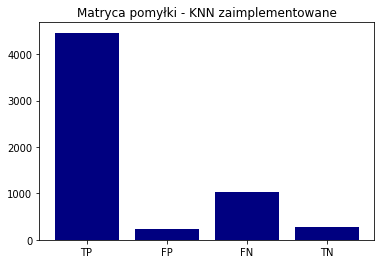

recall:  0.20971472629144178
precision 0.5291828793774319
0.3003865267807841
auc:  0.5791291045873539
KNN: ROC AUC=0.579


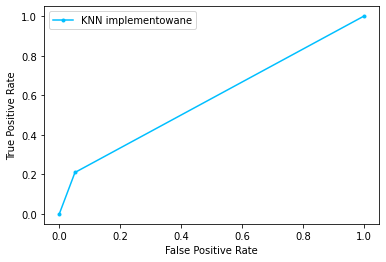

In [ ]:
from sklearn.metrics import accuracy_score
my_knn_acc = accuracy_score(y_test.tolist(), c)
print('accuracy: ',my_knn_acc)
from sklearn.metrics import confusion_matrix
my_knn_cm = confusion_matrix(y_test.tolist(), c)
print('confusion matrix: ',my_knn_cm)
names = ['TP', 'FP', 'FN', 'TN']
matrix_values = [my_knn_cm[0][0], my_knn_cm[0][1], my_knn_cm[1][0], my_knn_cm[1][1]]
plt.bar(range(len(names)), matrix_values, color='navy')
plt.title('Matryca pomyłki - KNN zaimplementowane')
plt.xticks(range(len(names)), names)
plt.show()
from sklearn.metrics import recall_score
my_knn_rs = recall_score(y_test.tolist(), c)
print('recall: ',my_knn_rs)
from sklearn.metrics import precision_score
my_knn_ps = precision_score(y_test.tolist(), c)
print('precision', my_knn_ps)
from sklearn.metrics import f1_score
my_knn_f1 = f1_score(y_test.tolist(), c)
print(my_knn_f1)
from sklearn.metrics import roc_curve, roc_auc_score
my_knn_ra = roc_auc_score(y_test.tolist(), c)
print('auc: ',my_knn_ra)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
my_auc_knn = roc_auc_score(y_test.tolist(),c)
print('KNN: ROC AUC=%.3f' % (my_auc_knn))
my_knn_fpr, my_knn_tpr, _ = roc_curve(y_test.tolist(), c)
pyplot.plot(my_knn_fpr, my_knn_tpr, marker='.', label='KNN implementowane', color='deepskyblue')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=4)
classifier_knn.fit(X_train.tolist(), y_train.tolist())
knn_predict = classifier_knn.predict(X_test.tolist())
print("Distribution:")
print(pd.Series(knn_predict).value_counts())

Distribution:
0    5458
1     542
dtype: int64


In [ ]:
import plotly.express as px
fig = px.scatter(
    X_test, x=0, y=1,
    color=knn_predict, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test.tolist(), knn_predict)
print(knn_acc)

0.7871666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test.tolist(), knn_predict)
print(knn_cm)

[[4442  261]
 [1016  281]]


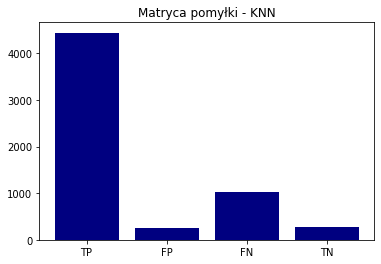

In [ ]:
names = ['TP', 'FP', 'FN', 'TN']
matrix_values = [knn_cm[0][0], knn_cm[0][1], knn_cm[1][0], knn_cm[1][1]]
plt.bar(range(len(names)), matrix_values, color='navy')
plt.title('Matryca pomyłki - KNN')
plt.xticks(range(len(names)), names)
plt.show()

In [ ]:
from sklearn.metrics import recall_score
knn_rs = recall_score(y_test.tolist(), knn_predict)
print(knn_rs)

0.2166538164996145


In [ ]:
from sklearn.metrics import precision_score
knn_ps = precision_score(y_test.tolist(), knn_predict)
print(knn_ps)

0.518450184501845


In [ ]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test.tolist(), knn_predict)
print(knn_f1)

0.30560087003806413


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
knn_ra = roc_auc_score(y_test.tolist(), knn_predict)
print(knn_ra)

0.5805786624492545


KNN: ROC AUC=0.581


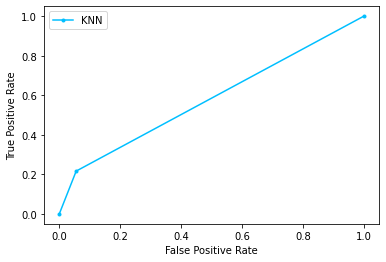

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
auc_knn = roc_auc_score(y_test.tolist(), knn_predict)
print('KNN: ROC AUC=%.3f' % (auc_knn))
knn_fpr, knn_tpr, _ = roc_curve(y_test.tolist(), knn_predict)
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN', color='deepskyblue')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
from  sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(X_train.tolist(), y_train.tolist())
svc_predict = classifier_svc.predict(X_test)
print("Distribution:")
print(pd.Series(svc_predict).value_counts())

Distribution:
0    5527
1     473
dtype: int64


In [ ]:
fig = px.scatter(
    X_test, x=0, y=1,
    color=svc_predict, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
svc_acc = accuracy_score(y_test.tolist(), svc_predict)
print('accuracy score:',svc_acc)
svc_cm = confusion_matrix(y_test.tolist(), svc_predict)
print('confusion matrix:',svc_cm)
svc_rs = recall_score(y_test.tolist(), svc_predict)
print('recall score:',svc_rs)
svc_ps = precision_score(y_test.tolist(), svc_predict)
print('precision score: ',svc_ps)
svc_f1 = f1_score(y_test.tolist(), svc_predict)
print('f1 score',svc_f1)
svc_ra = roc_auc_score(y_test.tolist(), svc_predict)
print('roc auc score: ',svc_ra)

accuracy score: 0.8073333333333333
confusion matrix: [[4537  166]
 [ 990  307]]
recall score: 0.23670007710100233
precision score:  0.6490486257928119
f1 score 0.3468926553672317
roc auc score:  0.6007017289608775


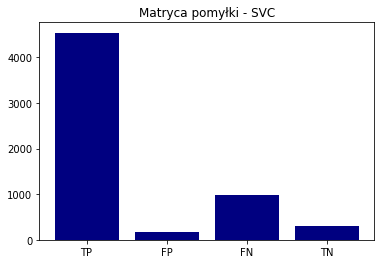

In [ ]:
names = ['TP', 'FP', 'FN', 'TN']
matrix_values = [svc_cm[0][0], svc_cm[0][1], svc_cm[1][0], svc_cm[1][1]]
plt.bar(range(len(names)), matrix_values, color='navy')
plt.title('Matryca pomyłki - SVC')
plt.xticks(range(len(names)), names)
plt.show()

SVC: ROC AUC=0.601


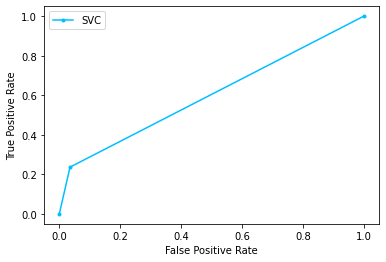

In [ ]:
auc_svc = roc_auc_score(y_test.tolist(), svc_predict)
print('SVC: ROC AUC=%.3f' % (auc_svc))
svc_fpr, svc_tpr, _ = roc_curve(y_test.tolist(), svc_predict)
pyplot.plot(svc_fpr, svc_tpr, marker='.', label='SVC', color='deepskyblue')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier_nn = MLPClassifier()
classifier_nn = classifier_nn.fit(X_train.tolist(), y_train.tolist())
nn_predict = classifier_nn.predict(X_test)
print("Distribution:")
print( pd.Series(nn_predict).value_counts() )

Distribution:
0    5278
1     722
dtype: int64


In [ ]:
fig = px.scatter(
    X_test, x=0, y=1,
    color=nn_predict, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
nn_acc = accuracy_score(y_test.tolist(), nn_predict)
print('accuracy score:',nn_acc)
nn_cm = confusion_matrix(y_test.tolist(), nn_predict)
print('confusion matrix:',nn_cm)
nn_rs = recall_score(y_test.tolist(), nn_predict)
print('recall score:',nn_rs)
nn_ps = precision_score(y_test.tolist(), nn_predict)
print('precision score: ',nn_ps)
nn_f1 = f1_score(y_test.tolist(), nn_predict)
print('f1 score',nn_f1)
nn_ra = roc_auc_score(y_test.tolist(), nn_predict)
print('roc auc score: ',nn_ra)

accuracy score: 0.8081666666666667
confusion matrix: [[4415  288]
 [ 863  434]]
recall score: 0.3346183500385505
precision score:  0.6011080332409973
f1 score 0.4299157999009411
roc auc score:  0.6366904210324583


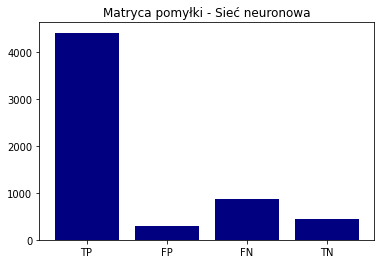

In [ ]:
names = ['TP', 'FP', 'FN', 'TN']
matrix_values = [nn_cm[0][0], nn_cm[0][1], nn_cm[1][0], nn_cm[1][1]]
plt.bar(range(len(names)), matrix_values, color='navy')
plt.title('Matryca pomyłki - Sieć neuronowa')
plt.xticks(range(len(names)), names)
plt.show()

Siec neuronowa: ROC AUC=0.637


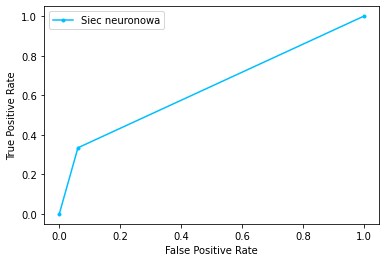

In [ ]:
auc_nn = roc_auc_score(y_test.tolist(), nn_predict)
print('Siec neuronowa: ROC AUC=%.3f' % (auc_nn))
nn_fpr, nn_tpr, _ = roc_curve(y_test.tolist(), nn_predict)
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Siec neuronowa', color='deepskyblue')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
classifier_em = BaggingClassifier()
classifier_em = classifier_em.fit(X_train.tolist(), y_train.tolist())
em_predict = classifier_em.predict(X_test)
print("Distribution:")
print( pd.Series(em_predict).value_counts() )

Distribution:
0    5266
1     734
dtype: int64


In [ ]:
fig = px.scatter(
    X_test, x=0, y=1,
    color=em_predict, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
em_acc = accuracy_score(y_test.tolist(), em_predict)
print('accuracy score:',em_acc)
em_cm = confusion_matrix(y_test.tolist(), em_predict)
print('confusion matrix:',em_cm)
em_rs = recall_score(y_test.tolist(), em_predict)
print('recall score:',em_rs)
em_ps = precision_score(y_test.tolist(), em_predict)
print('precision score: ',em_ps)
em_f1 = f1_score(y_test.tolist(), em_predict)
print('f1 score',em_f1)
em_ra = roc_auc_score(y_test.tolist(), em_predict)
print('roc auc score: ',em_ra)

accuracy score: 0.7805
confusion matrix: [[4326  377]
 [ 940  357]]
recall score: 0.27525057825751736
precision score:  0.48637602179836514
f1 score 0.3515509601181684
roc auc score:  0.5975444896390713


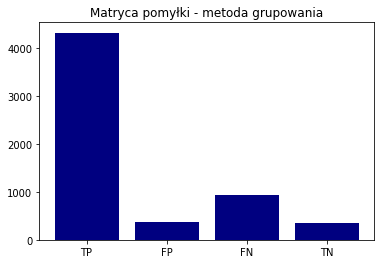

In [ ]:
names = ['TP', 'FP', 'FN', 'TN']
matrix_values = [em_cm[0][0], em_cm[0][1], em_cm[1][0], em_cm[1][1]]
plt.bar(range(len(names)), matrix_values, color='navy')
plt.title('Matryca pomyłki - metoda grupowania')
plt.xticks(range(len(names)), names)
plt.show()

Metoda grupowania: ROC AUC=0.598


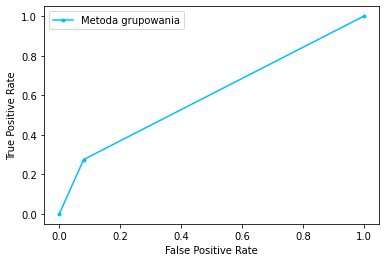

In [ ]:
auc_em = roc_auc_score(y_test.tolist(), em_predict)
print('Metoda grupowania: ROC AUC=%.3f' % (auc_em))
em_fpr, em_tpr, _ = roc_curve(y_test.tolist(), em_predict)
pyplot.plot(em_fpr, em_tpr, marker='.', label='Metoda grupowania', color='deepskyblue')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree = classifier_tree.fit(X_train.tolist(), y_train.tolist())
tree_predict = classifier_tree.predict(X_test)
print("Distribution:")
print( pd.Series(tree_predict).value_counts() )

Distribution:
0    4602
1    1398
dtype: int64


In [ ]:
fig = px.scatter(
    X_test, x=0, y=1,
    color=tree_predict, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

In [ ]:
tree_acc = accuracy_score(y_test.tolist(), tree_predict)
print('accuracy score:',tree_acc)
tree_cm = confusion_matrix(y_test.tolist(), tree_predict)
print('confusion matrix:',tree_cm)
tree_rs = recall_score(y_test.tolist(), tree_predict)
print('recall score:',tree_rs)
tree_ps = precision_score(y_test.tolist(), tree_predict)
print('precision score: ',tree_ps)
tree_f1 = f1_score(y_test.tolist(), tree_predict)
print('f1 score',tree_f1)
tree_ra = roc_auc_score(y_test.tolist(), tree_predict)
print('roc auc score: ',tree_ra)

accuracy score: 0.7045
confusion matrix: [[3766  937]
 [ 836  461]]
recall score: 0.3554356206630686
precision score:  0.32975679542203146
f1 score 0.3421150278293135
roc auc score:  0.5781005447563695


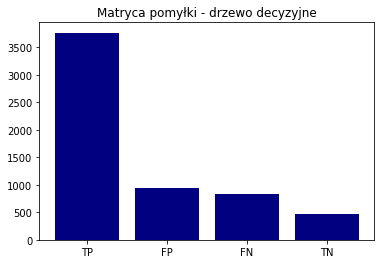

In [ ]:
names = ['TP', 'FP', 'FN', 'TN']
matrix_values = [tree_cm[0][0], tree_cm[0][1], tree_cm[1][0], tree_cm[1][1]]
plt.bar(range(len(names)), matrix_values, color='navy')
plt.title('Matryca pomyłki - drzewo decyzyjne')
plt.xticks(range(len(names)), names)
plt.show()

Drzewo decyzyjne: ROC AUC=0.578


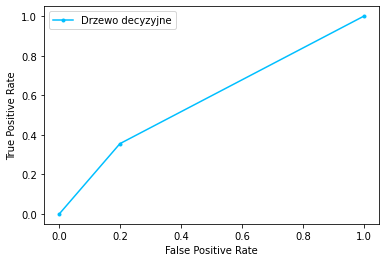

In [ ]:
auc_tree = roc_auc_score(y_test.tolist(), tree_predict)
print('Drzewo decyzyjne: ROC AUC=%.3f' % (auc_tree))
tree_fpr, tree_tpr, _ = roc_curve(y_test.tolist(), tree_predict)
pyplot.plot(tree_fpr, tree_tpr, marker='.', label='Drzewo decyzyjne', color='deepskyblue')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

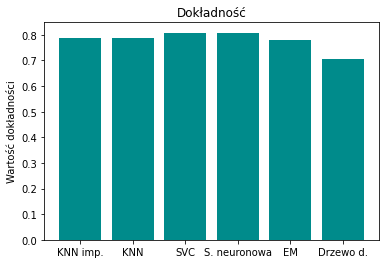

In [ ]:
names = ['KNN imp.','KNN', 'SVC', 'S. neuronowa', 'EM', 'Drzewo d.']
accuracy_values = [my_knn_acc, knn_acc, svc_acc, nn_acc, em_acc, tree_acc]
plt.bar(range(len(names)), accuracy_values, color='darkcyan')
plt.ylabel('Wartość dokładności')
plt.title('Dokładność')
plt.xticks(range(len(names)), names)
plt.show()

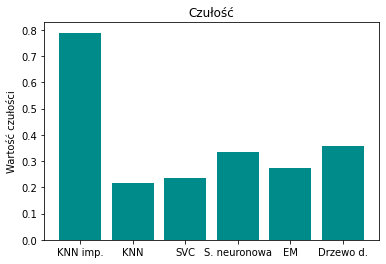

In [ ]:
names = ['KNN imp.','KNN', 'SVC', 'S. neuronowa', 'EM', 'Drzewo d.']
rs_values = [my_knn_acc, knn_rs, svc_rs, nn_rs, em_rs, tree_rs]
plt.bar(range(len(names)), rs_values, color='darkcyan')
plt.ylabel('Wartość czułości')
plt.title('Czułość')
plt.xticks(range(len(names)), names)
plt.show()

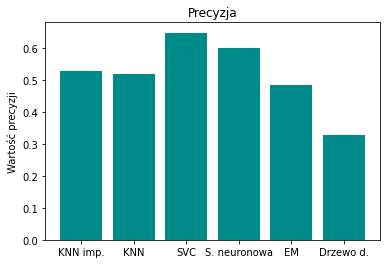

In [ ]:
names = ['KNN imp.','KNN', 'SVC', 'S. neuronowa', 'EM', 'Drzewo d.']
ps_values = [my_knn_ps, knn_ps, svc_ps, nn_ps, em_ps, tree_ps]
plt.bar(range(len(names)), ps_values, color='darkcyan')
plt.ylabel('Wartość precyzji')
plt.title('Precyzja')
plt.xticks(range(len(names)), names)
plt.show()

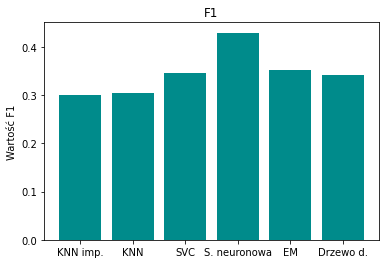

In [ ]:
names = ['KNN imp.','KNN', 'SVC', 'S. neuronowa', 'EM', 'Drzewo d.']
f1_values = [my_knn_f1,knn_f1, svc_f1, nn_f1, em_f1, tree_f1]
plt.bar(range(len(names)), f1_values, color='darkcyan')
plt.ylabel('Wartość F1')
plt.title('F1')
plt.xticks(range(len(names)), names)
plt.show()

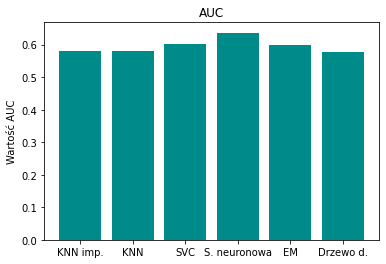

In [ ]:
names = ['KNN imp.','KNN', 'SVC', 'S. neuronowa', 'EM', 'Drzewo d.']
ra_values = [my_knn_ra, knn_ra, svc_ra, nn_ra, em_ra, tree_ra]
plt.bar(range(len(names)), ra_values, color='darkcyan')
plt.ylabel('Wartość AUC')
plt.title('AUC')
plt.xticks(range(len(names)), names)
plt.show()

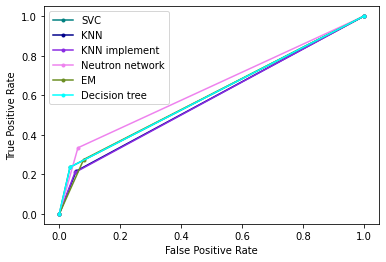

In [ ]:
knn_fpr, knn_tpr, _ = roc_curve(y_test.tolist(), knn_predict)
svc_fpr, svc_tpr, _ = roc_curve(y_test.tolist(), svc_predict)
nn_fpr, nn_tpr, _ = roc_curve(y_test.tolist(), nn_predict)
em_fpr, em_tpr, _ = roc_curve(y_test.tolist(), em_predict)
tree_fpr, tree_tpr, _ = roc_curve(y_test.tolist(), svc_predict)
my_knn_fpr, my_knn_tpr, _ = roc_curve(y_test.tolist(), c)

pyplot.plot(svc_fpr, svc_tpr, marker='.', label='SVC', color='teal')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN', color='darkblue')
pyplot.plot(my_knn_fpr, my_knn_tpr, marker='.', label='KNN implement', color='blueviolet')
pyplot.plot(nn_fpr, nn_tpr, marker='.', label='Neutron network', color='violet')
pyplot.plot(em_fpr, em_tpr, marker='.', label='EM', color='olivedrab')
pyplot.plot(tree_fpr, tree_tpr, marker='.', label='Decision tree', color='aqua')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
